## Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import utils

## Load Data

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
submission = pd.read_csv('./data/submission.csv')

## EDA

In [3]:
train

,id,digit,letter,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,...,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,...,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,...,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,...,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,...,4,4,3,2,1,3,4,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,2044,6,V,2,4,3,4,2,4,4,...,0,2,2,0,0,1,3,1,4,0
2044,2045,1,L,3,2,2,1,1,4,0,...,2,3,4,2,1,2,3,4,1,1
2045,2046,9,A,4,0,4,0,2,4,4,...,2,3,1,1,3,4,2,2,0,0
2046,2047,0,Z,2,3,3,0,3,0,4,...,2,3,1,1,0,4,1,4,3,1


In [4]:
pd.value_counts(train['letter'])

Z    91
O    90
K    90
L    89
H    89
G    87
M    86
Y    86
U    85
Q    82
T    82
R    81
F    80
X    79
N    77
S    76
D    76
C    74
V    73
A    72
B    71
W    69
J    67
E    66
P    66
I    64
Name: letter, dtype: int64

In [5]:
test

,id,letter,0,1,2,3,4,5,6,7,...,774,775,776,777,778,779,780,781,782,783
0,2049,L,0,4,0,2,4,2,3,1,...,2,0,4,2,2,4,3,4,1,4
1,2050,C,4,1,4,0,1,1,0,2,...,0,3,2,4,2,4,2,2,1,2
2,2051,S,0,4,0,1,3,2,3,0,...,1,3,2,0,3,2,3,0,1,4
3,2052,K,2,1,3,3,3,4,3,0,...,3,0,3,2,4,1,0,4,4,4
4,2053,W,1,0,1,1,2,2,1,4,...,4,3,1,4,0,2,1,2,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20475,22524,P,1,2,1,1,0,0,0,2,...,0,1,3,0,3,0,4,3,1,4
20476,22525,S,4,1,1,4,0,0,1,1,...,1,3,1,0,0,1,3,1,2,0
20477,22526,B,4,2,1,3,2,1,3,0,...,3,2,3,4,1,0,3,3,1,1
20478,22527,K,1,1,2,3,4,0,4,3,...,2,0,0,4,3,3,3,4,4,2


In [6]:
X_temp = np.array(train[[str(i) for i in range(784)]][:32])
X_temp = X_temp.reshape(-1,1,28,28)
X_temp.shape

(32, 1, 28, 28)

In [7]:
y_digit = train['digit'].values
y_letter = train['letter'].values

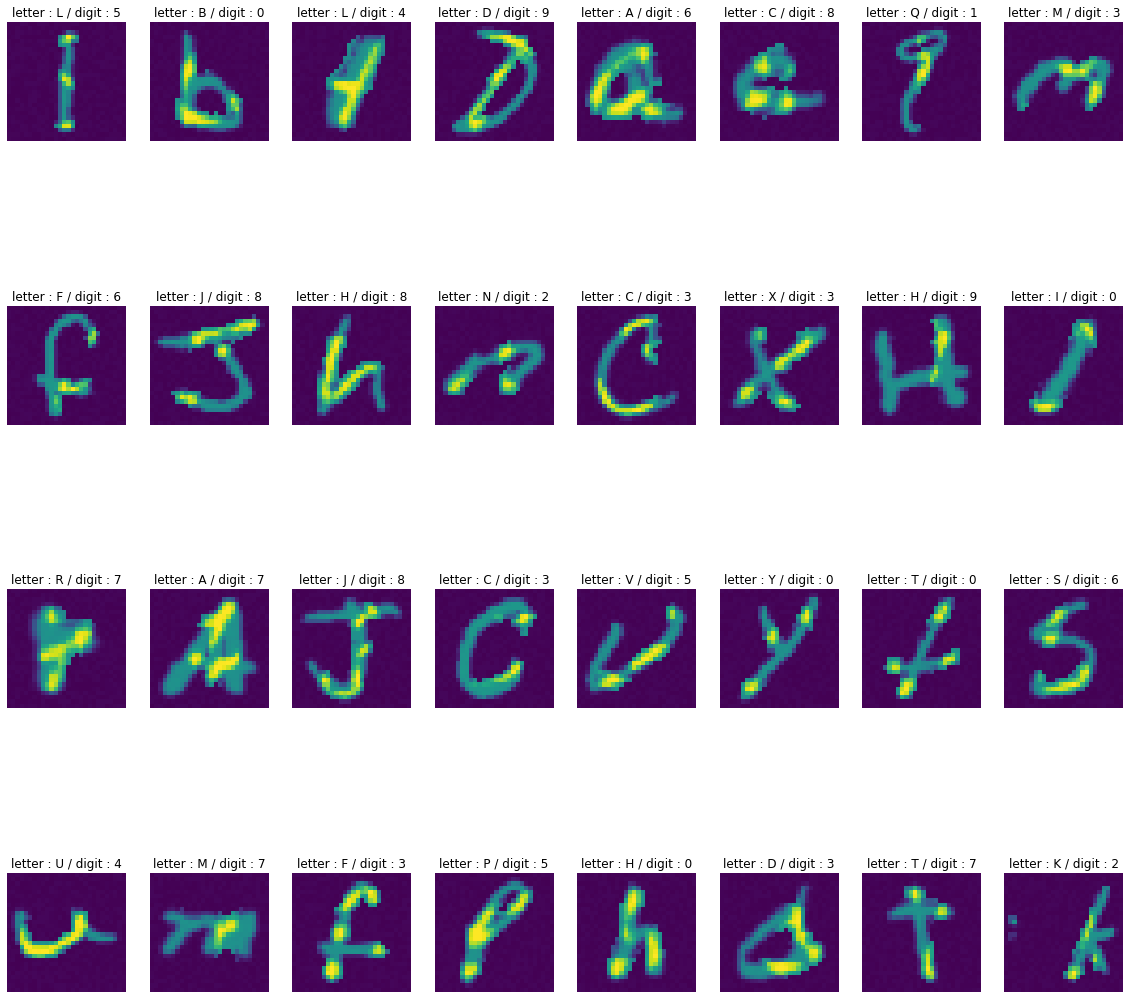

In [8]:
plt.figure(figsize=(20,20))
for idx, (image, digit, letter) in enumerate(zip(X_temp[:32], y_digit[:32] ,y_letter[:32])):
    plt.subplot(4,8,idx+1)
    plt.imshow(image[0])
    title = 'letter : {} / digit : {}'.format(letter, digit)
    plt.title(title, fontdict={'color':'black'})
    plt.axis('off')

In [9]:
# testt = X_temp[0][1]

In [10]:
# X_tempss = np.array(test[[str(i) for i in range(784)]][:32])
# X_tempss = X_tempss.reshape(-1,1,28,28)
# X_tempss.shape

In [11]:
# # testt //= 127
# # testt
# plt.figure(figsize=(10,10))
# plt.imshow(X_tempss[2][0])
# plt.axis('off')

In [12]:
# import cv2
# testt = np.array(testt, np.uint8)

In [13]:
# kernel = np.ones((2,2), np.uint8)
# dilated = cv2.erode(testt, kernel, iterations = 1)

In [14]:
# dilated

In [15]:
# # testt //= 127
# # testt
# # plt.figure(figsize=(10,10))
# plt.imshow(dilated)
# plt.axis('off')

## Dataset 

In [16]:
X_train = train.drop(['letter','id','digit'],axis=1)
X_test = test.drop(['letter','id'],axis=1)

In [17]:
X_train /= 255.0
X_test /= 255.0

In [18]:
# ### 28x28 -> 56x56
# X_train = np.repeat(X_train, 2, axis=1)
# X_test = np.repeat(X_test, 2, axis=1)
# X_train = np.repeat(X_train, 2, axis=2)
# X_test = np.repeat(X_test, 2, axis=2)

In [19]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

In [20]:
X_train.shape

(2048, 28, 28, 1)

In [21]:
X_test.shape

(20480, 28, 28, 1)

In [22]:
y_train = train['digit']

In [23]:
y_train = utils.to_categorical(y_train, 10)

In [24]:
y_train.shape

(2048, 10)

## Train

In [25]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=2020, stratify=train['digit'])

In [26]:
X_train.shape

(1843, 28, 28, 1)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Add, Input, Flatten, Dense, GlobalAveragePooling2D, Dropout, Conv2D, BatchNormalization, MaxPooling2D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.losses import sparse_categorical_crossentropy

In [28]:
# _input = Input((56, 56, 1))

# conv1 = Conv2D(filters=64, kernel_size=(
#     3, 3), padding="same", activation="relu")(_input)
# conv2 = Conv2D(filters=64, kernel_size=(3, 3),
#                padding="same", activation="relu")(conv1)
# pool1 = MaxPooling2D((2, 2))(conv2)

# shortcut = pool1         # Skip Connection
# shortcut = Conv2D(filters=512, kernel_size=(
#     3, 3), padding="same", activation="relu")(shortcut)
# shortcut = MaxPooling2D((16, 16))(shortcut)

# conv3 = Conv2D(filters=128, kernel_size=(3, 3),
#                padding="same", activation="relu")(pool1)
# conv4 = Conv2D(filters=128, kernel_size=(3, 3),
#                padding="same", activation="relu")(conv3)
# pool2 = MaxPooling2D((2, 2))(conv4)

# conv5 = Conv2D(filters=256, kernel_size=(3, 3),
#                padding="same", activation="relu")(pool2)
# conv6 = Conv2D(filters=256, kernel_size=(3, 3),
#                padding="same", activation="relu")(conv5)
# conv7 = Conv2D(filters=256, kernel_size=(3, 3),
#                padding="same", activation="relu")(conv6)
# pool3 = MaxPooling2D((2, 2))(conv7)

# conv8 = Conv2D(filters=512, kernel_size=(3, 3),
#                padding="same", activation="relu")(pool3)
# conv9 = Conv2D(filters=512, kernel_size=(3, 3),
#                padding="same", activation="relu")(conv8)
# conv10 = Conv2D(filters=512, kernel_size=(3, 3),
#                 padding="same", activation="relu")(conv9)
# pool4 = MaxPooling2D((2, 2))(conv10)

# conv11 = Conv2D(filters=512, kernel_size=(3, 3),
#                 padding="same", activation="relu")(pool4)
# conv12 = Conv2D(filters=512, kernel_size=(3, 3),
#                 padding="same", activation="relu")(conv11)
# conv13 = Conv2D(filters=512, kernel_size=(3, 3),
#                 padding="same", activation="relu")(conv12)
# pool5 = MaxPooling2D((2, 2))(conv13)

# add = Add()([shortcut, pool5])  # Skip Connection

# flat = Flatten()(add)
# dense1 = Dense(4096, activation="relu")(flat)
# dense2 = Dense(1024, activation="relu")(dense1)
# output = Dense(10, activation="softmax")(dense2)

# cnn_model = Model(inputs=_input, outputs=output)

In [29]:
# cnn_model.summary()

In [30]:
# cnn_model = Sequential()

# cnn_model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
#                  activation ='relu', input_shape = (28,28,1)))
# cnn_model.add(BatchNormalization())
# cnn_model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
#                  activation ='relu'))
# cnn_model.add(BatchNormalization())
# cnn_model.add(MaxPooling2D(pool_size=(2,2)))
# cnn_model.add(Dropout(0.25))

# cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
#                  activation ='relu'))
# cnn_model.add(BatchNormalization())
# cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
#                  activation ='relu'))
# cnn_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
# cnn_model.add(Dropout(0.25))

# cnn_model.add(GlobalAveragePooling2D())
# cnn_model.add(BatchNormalization())
# cnn_model.add(Dense(256, activation = "relu"))

# cnn_model.add(Dropout(0.5))
# cnn_model.add(Dense(10, activation = "softmax"))

In [31]:
# cnn_model.summary()

In [32]:
reduction_ratio=16

In [33]:
input_ = tf.keras.layers.Input(shape=(28,28,1)) 
conv1 = tf.keras.layers.Conv2D(filters=128, kernel_size=(5,5), kernel_initializer='he_normal', activation='elu', padding='same',
                              kernel_constraint=tf.keras.constraints.max_norm(3.))(input_) #28x28x128


## Residual Unit1
batch1_1 = tf.keras.layers.BatchNormalization()(conv1)
elu1_1 = tf.keras.layers.ELU()(batch1_1)
res1_1 = tf.keras.layers.Conv2D(filters=32, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu1_1) 
batch1_2 = tf.keras.layers.BatchNormalization()(res1_1)
elu1_2 = tf.keras.layers.ELU()(batch1_2)
res1_2 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu1_2) 
batch1_3 = tf.keras.layers.BatchNormalization()(res1_2)
elu1_3 = tf.keras.layers.ELU()(batch1_3)
res1_3 = tf.keras.layers.Conv2D(filters=128, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu1_3)                          

# SEBlock1
ch_input1 = 128
ch_reduced1 = ch_input1//reduction_ratio
avpool1 = tf.keras.layers.GlobalAveragePooling2D()(res1_3)
sed1_1 = tf.keras.layers.Dense(ch_reduced1, kernel_initializer='he_normal', activation='elu', use_bias=False)(avpool1)
sed1_2 = tf.keras.layers.Dense(ch_input1, kernel_initializer='he_normal', activation='sigmoid', use_bias=False)(sed1_1)
reshape1 = tf.keras.layers.Reshape((1,1,ch_input1))(sed1_2)
mul1 = tf.keras.layers.Multiply()([res1_3, reshape1])
#

skip1 = tf.keras.layers.Conv2D(filters=128, kernel_size=(1,1), padding='same')(conv1)
res1 = tf.keras.layers.Add()([mul1, skip1]) #28x28x128
##

## Residual Unit2
batch2_1 = tf.keras.layers.BatchNormalization()(res1)
elu2_1 = tf.keras.layers.ELU()(batch2_1)
res2_1 = tf.keras.layers.Conv2D(filters=32, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu2_1) 
batch2_2 = tf.keras.layers.BatchNormalization()(res2_1)
elu2_2 = tf.keras.layers.ELU()(batch2_2)
res2_2 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu2_2) 
batch2_3 = tf.keras.layers.BatchNormalization()(res2_2)
elu2_3 = tf.keras.layers.ELU()(batch2_3)
res2_3 = tf.keras.layers.Conv2D(filters=128, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu2_3)                         


# SEBlock2
ch_input2 = 128
ch_reduced2 = ch_input2//reduction_ratio
avpool2 = tf.keras.layers.GlobalAveragePooling2D()(res2_3)
sed2_1 = tf.keras.layers.Dense(ch_reduced2, kernel_initializer='he_normal', activation='elu', use_bias=False)(avpool2)
sed2_2 = tf.keras.layers.Dense(ch_input2, kernel_initializer='he_normal', activation='sigmoid', use_bias=False)(sed2_1)
reshape2 = tf.keras.layers.Reshape((1,1,ch_input2))(sed2_2)
mul2 = tf.keras.layers.Multiply()([res2_3, reshape2])
#
skip2 = tf.keras.layers.Conv2D(filters=128, kernel_size=(1,1), padding='same')(res1)
res2 = tf.keras.layers.Add()([mul2, skip2])
drop2 = tf.keras.layers.Dropout(0.3)(res2) # 28x28x128
##


## Residual Unit3
batch3_1 = tf.keras.layers.BatchNormalization()(drop2)
elu3_1 = tf.keras.layers.ELU()(batch3_1)
res3_1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu3_1) 
batch3_2 = tf.keras.layers.BatchNormalization()(res3_1)
elu3_2 = tf.keras.layers.ELU()(batch3_2)
res3_2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu3_2) 
batch3_3 = tf.keras.layers.BatchNormalization()(res3_2)
elu3_3 = tf.keras.layers.ELU()(batch3_3)
res3_3 = tf.keras.layers.Conv2D(filters=128, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu3_3)                           


# SEBlock3
ch_input3 = 128
ch_reduced3 = ch_input3//reduction_ratio
avpool3 = tf.keras.layers.GlobalAveragePooling2D()(res3_3)
sed3_1 = tf.keras.layers.Dense(ch_reduced3, kernel_initializer='he_normal', activation='elu', use_bias=False)(avpool3)
sed3_2 = tf.keras.layers.Dense(ch_input3, kernel_initializer='he_normal', activation='sigmoid', use_bias=False)(sed3_1)
reshape3 = tf.keras.layers.Reshape((1,1,ch_input3))(sed3_2)
mul3 = tf.keras.layers.Multiply()([res3_3, reshape3])
#
skip3 = tf.keras.layers.Conv2D(filters=128, kernel_size=(1,1),padding='same')(drop2)
res3 = tf.keras.layers.Add()([mul3, skip3]) #28x28x128
##


## Residual Unit4
batch4_1 = tf.keras.layers.BatchNormalization()(res3)
elu4_1 = tf.keras.layers.ELU()(batch4_1)
res4_1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu4_1) 
batch4_2 = tf.keras.layers.BatchNormalization()(res4_1)
elu4_2 = tf.keras.layers.ELU()(batch4_2)
res4_2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu4_2) 
batch4_3 = tf.keras.layers.BatchNormalization()(res4_2)
elu4_3 = tf.keras.layers.ELU()(batch4_3)
res4_3 = tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu4_3)                              


# SEBlock4
ch_input4 = 256
ch_reduced4 = ch_input4//reduction_ratio
avpool4 = tf.keras.layers.GlobalAveragePooling2D()(res4_3)
sed4_1 = tf.keras.layers.Dense(ch_reduced4, kernel_initializer='he_normal', activation='elu', use_bias=False)(avpool4)
sed4_2 = tf.keras.layers.Dense(ch_input4, kernel_initializer='he_normal', activation='sigmoid', use_bias=False)(sed4_1)
reshape4 = tf.keras.layers.Reshape((1,1,ch_input4))(sed4_2)
mul4 = tf.keras.layers.Multiply()([res4_3, reshape4])
#
skip4 = tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1),padding='same')(res3)
res4 = tf.keras.layers.Add()([mul4, skip4])
pool4 = tf.keras.layers.MaxPool2D((2,2))(res4)
drop4 = tf.keras.layers.Dropout(0.3)(pool4) # 14x14x256
##


## Residual Unit5
batch5_1 = tf.keras.layers.BatchNormalization()(drop4)
elu5_1 = tf.keras.layers.ELU()(batch5_1)
res5_1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu5_1) 
batch5_2 = tf.keras.layers.BatchNormalization()(res5_1)
elu5_2 = tf.keras.layers.ELU()(batch5_2)
res5_2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu5_2) 
batch5_3 = tf.keras.layers.BatchNormalization()(res5_2)
elu5_3 = tf.keras.layers.ELU()(batch5_3)
res5_3 = tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu5_3)                                 


# SEBlock5
ch_input5 = 256
ch_reduced5 = ch_input5//reduction_ratio
avpool5 = tf.keras.layers.GlobalAveragePooling2D()(res5_3)
sed5_1 = tf.keras.layers.Dense(ch_reduced5, kernel_initializer='he_normal', activation='elu', use_bias=False)(avpool5)
sed5_2 = tf.keras.layers.Dense(ch_input5, kernel_initializer='he_normal', activation='sigmoid', use_bias=False)(sed5_1)
reshape5 = tf.keras.layers.Reshape((1,1,ch_input5))(sed5_2)
mul5 = tf.keras.layers.Multiply()([res5_3, reshape5])
#
skip5 = tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1),padding='same')(drop4)
res5 = tf.keras.layers.Add()([mul5, skip5])
pool5 = tf.keras.layers.MaxPool2D((2,2))(res5) #7x7x256
##


## Residual Unit6
batch6_1 = tf.keras.layers.BatchNormalization()(pool5)
elu6_1 = tf.keras.layers.ELU()(batch6_1)
res6_1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu6_1) 
batch6_2 = tf.keras.layers.BatchNormalization()(res6_1)
elu6_2 = tf.keras.layers.ELU()(batch6_2)
res6_2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu6_2) 
batch6_3 = tf.keras.layers.BatchNormalization()(res6_2)
elu6_3 = tf.keras.layers.ELU()(batch6_3)
res6_3 = tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu6_3)
# SEBlock6
ch_input6 = 256
ch_reduced6 = ch_input6//reduction_ratio
avpool6 = tf.keras.layers.GlobalAveragePooling2D()(res6_3)
sed6_1 = tf.keras.layers.Dense(ch_reduced6, kernel_initializer='he_normal', activation='elu', use_bias=False)(avpool6)
sed6_2 = tf.keras.layers.Dense(ch_input6, kernel_initializer='he_normal', activation='sigmoid', use_bias=False)(sed6_1)
reshape6 = tf.keras.layers.Reshape((1,1,ch_input6))(sed6_2)
mul6 = tf.keras.layers.Multiply()([res6_3, reshape6])
#
skip6 = tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1),padding='same')(pool5)
res6 = tf.keras.layers.Add()([mul6, skip6])
drop6 = tf.keras.layers.Dropout(0.3)(res6) # 7x7x256
##

## Residual Unit7
batch7_1 = tf.keras.layers.BatchNormalization()(drop6)
elu7_1 = tf.keras.layers.ELU()(batch7_1)
res7_1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu7_1) 
batch7_2 = tf.keras.layers.BatchNormalization()(res7_1)
elu7_2 = tf.keras.layers.ELU()(batch7_2)
res7_2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu7_2) 
batch7_3 = tf.keras.layers.BatchNormalization()(res7_2)
elu7_3 = tf.keras.layers.ELU()(batch7_3)
res7_3 = tf.keras.layers.Conv2D(filters=512, kernel_size=(1,1), padding='same',kernel_constraint=tf.keras.constraints.max_norm(3.))(elu7_3)
skip7 = tf.keras.layers.Conv2D(filters=512, kernel_size=(1,1),padding='same')(drop6)
res7 = tf.keras.layers.Add()([res7_3, skip7])
pool7 = tf.keras.layers.MaxPool2D((3,3))(res7) # 2x2x512
##

## Classification Unit
flatten = tf.keras.layers.Flatten()(pool7)
dense1 = tf.keras.layers.Dense(1024, activation='elu', kernel_initializer='he_normal', kernel_constraint=tf.keras.constraints.max_norm(3.))(flatten)
drop10 = tf.keras.layers.Dropout(0.5)(dense1)
output = tf.keras.layers.Dense(10 ,activation='softmax')(drop10)

In [34]:
cnn_model = Model(inputs= [input_], outputs=[output])

In [35]:
cnn_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 28, 28, 128)  3328        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 28, 28, 128)  512         conv2d[0][0]                     
__________________________________________________________________________________________________
elu (ELU)                       (None, 28, 28, 128)  0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [36]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=50)

In [37]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    "EE.h5", save_best_only=True, monitor='val_accuracy', mode='auto')

In [38]:
cnn_model.compile(loss='categorical_crossentropy', optimizer=Adam(
    lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07), metrics=['accuracy'])

In [39]:
# cnn_model.compile(loss= 'sparse_categorical_crossentropy',optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0),metrics= ['accuracy'])

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [41]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    fill_mode='nearest'
)
datagen.fit(X_train)

In [42]:
epochs = 500
batch_size = 32

In [43]:
len(X_train)

1843

In [44]:
X_train.shape[0]

1843

In [45]:
history = cnn_model.fit_generator(datagen.flow(X_train, y_train, shuffle=True, batch_size=batch_size),
                                  epochs=epochs, validation_data=(
                                      X_valid, y_valid),
                                  verbose=1,
                                 steps_per_epoch=X_train.shape[0] // batch_size,
                                  validation_steps=X_valid.shape[0] //batch_size,
                                  callbacks=[checkpoint_cb, lr_scheduler]
                                  )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/500
57/57 [==============================] - 31s 546ms/step - loss: 4.7949 - accuracy: 0.1179 - val_loss: 2.5040 - val_accuracy: 0.1268 - lr: 0.0010
Epoch 2/500
57/57 [==============================] - 2s 43ms/step - loss: 2.9916 - accuracy: 0.1287 - val_loss: 5.2347 - val_accuracy: 0.0976 - lr: 0.0010
Epoch 3/500
57/57 [==============================] - 2s 43ms/step - loss: 2.8825 - accuracy: 0.1259 - val_loss: 4.3528 - val_accuracy: 0.0976 - lr: 0.0010
Epoch 4/500
57/57 [==============================] - 2s 43ms/step - loss: 2.9184 - accuracy: 0.1215 - val_loss: 4.0927 - val_accuracy: 0.0976 - lr: 0.0010
Epoch 5/500
57/57 [==============================] - 2s 43ms/step - loss: 2.7204 - accuracy: 0.1541 - val_loss: 2.9280 - val_accuracy: 0.1073 - lr: 0.0010
Epoch 6/500
57/57 [==============================] - 3s 48ms/step - loss: 2.6923 - accuracy: 0.1535 - val_loss: 3.2176 - val_accuracy: 0.1317 - lr:

Epoch 52/500
57/57 [==============================] - 3s 44ms/step - loss: 1.3855 - accuracy: 0.5538 - val_loss: 1.3066 - val_accuracy: 0.6049 - lr: 0.0010
Epoch 53/500
57/57 [==============================] - 2s 44ms/step - loss: 1.3696 - accuracy: 0.5367 - val_loss: 1.0442 - val_accuracy: 0.6976 - lr: 0.0010
Epoch 54/500
57/57 [==============================] - 2s 43ms/step - loss: 1.3208 - accuracy: 0.5583 - val_loss: 1.5198 - val_accuracy: 0.6537 - lr: 0.0010
Epoch 55/500
57/57 [==============================] - 2s 43ms/step - loss: 1.4370 - accuracy: 0.5168 - val_loss: 1.0724 - val_accuracy: 0.7268 - lr: 0.0010
Epoch 56/500
57/57 [==============================] - 3s 48ms/step - loss: 1.3414 - accuracy: 0.5533 - val_loss: 0.8782 - val_accuracy: 0.7610 - lr: 0.0010
Epoch 57/500
57/57 [==============================] - 2s 43ms/step - loss: 1.3217 - accuracy: 0.5583 - val_loss: 1.0973 - val_accuracy: 0.6732 - lr: 0.0010
Epoch 58/500
57/57 [==============================] - 2s 43ms/st

57/57 [==============================] - 2s 43ms/step - loss: 1.0433 - accuracy: 0.6742 - val_loss: 0.8876 - val_accuracy: 0.7902 - lr: 0.0010
Epoch 105/500
57/57 [==============================] - 2s 43ms/step - loss: 1.0809 - accuracy: 0.6527 - val_loss: 0.8910 - val_accuracy: 0.7951 - lr: 0.0010
Epoch 106/500
57/57 [==============================] - 2s 44ms/step - loss: 1.1015 - accuracy: 0.6455 - val_loss: 0.6196 - val_accuracy: 0.8195 - lr: 0.0010
Epoch 107/500
57/57 [==============================] - 3s 48ms/step - loss: 0.9895 - accuracy: 0.6753 - val_loss: 0.5147 - val_accuracy: 0.8537 - lr: 0.0010
Epoch 108/500
57/57 [==============================] - 2s 43ms/step - loss: 1.0549 - accuracy: 0.6582 - val_loss: 0.7072 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 109/500
57/57 [==============================] - 2s 43ms/step - loss: 1.0378 - accuracy: 0.6659 - val_loss: 0.8013 - val_accuracy: 0.7951 - lr: 0.0010
Epoch 110/500
57/57 [==============================] - 2s 43ms/step - lo

57/57 [==============================] - 2s 43ms/step - loss: 0.9174 - accuracy: 0.7035 - val_loss: 0.8477 - val_accuracy: 0.7707 - lr: 0.0010
Epoch 157/500
57/57 [==============================] - 2s 43ms/step - loss: 0.9270 - accuracy: 0.7024 - val_loss: 0.8712 - val_accuracy: 0.7707 - lr: 0.0010
Epoch 158/500
57/57 [==============================] - 2s 44ms/step - loss: 0.7891 - accuracy: 0.7543 - val_loss: 0.5747 - val_accuracy: 0.8439 - lr: 5.0000e-04
Epoch 159/500
57/57 [==============================] - 2s 44ms/step - loss: 0.7308 - accuracy: 0.7565 - val_loss: 0.5484 - val_accuracy: 0.8244 - lr: 5.0000e-04
Epoch 160/500
57/57 [==============================] - 2s 43ms/step - loss: 0.7329 - accuracy: 0.7626 - val_loss: 0.5510 - val_accuracy: 0.8390 - lr: 5.0000e-04
Epoch 161/500
57/57 [==============================] - 2s 43ms/step - loss: 0.6795 - accuracy: 0.7631 - val_loss: 0.6042 - val_accuracy: 0.8488 - lr: 5.0000e-04
Epoch 162/500
57/57 [==============================] - 2

57/57 [==============================] - 2s 43ms/step - loss: 0.5342 - accuracy: 0.8272 - val_loss: 0.4891 - val_accuracy: 0.8683 - lr: 5.0000e-04
Epoch 208/500
57/57 [==============================] - 2s 43ms/step - loss: 0.5529 - accuracy: 0.8189 - val_loss: 0.6869 - val_accuracy: 0.8195 - lr: 5.0000e-04
Epoch 209/500
57/57 [==============================] - 2s 41ms/step - loss: 0.5780 - accuracy: 0.7951 - val_loss: 0.6648 - val_accuracy: 0.8488 - lr: 5.0000e-04
Epoch 210/500
57/57 [==============================] - 2s 42ms/step - loss: 0.5766 - accuracy: 0.8161 - val_loss: 0.7142 - val_accuracy: 0.8098 - lr: 5.0000e-04
Epoch 211/500
57/57 [==============================] - 2s 43ms/step - loss: 0.5523 - accuracy: 0.8156 - val_loss: 0.6639 - val_accuracy: 0.8293 - lr: 5.0000e-04
Epoch 212/500
57/57 [==============================] - 2s 43ms/step - loss: 0.5205 - accuracy: 0.8399 - val_loss: 0.5632 - val_accuracy: 0.8341 - lr: 5.0000e-04
Epoch 213/500
57/57 [===========================

Epoch 258/500
57/57 [==============================] - 2s 43ms/step - loss: 0.5157 - accuracy: 0.8415 - val_loss: 0.7757 - val_accuracy: 0.8390 - lr: 5.0000e-04
Epoch 259/500
57/57 [==============================] - 2s 43ms/step - loss: 0.4980 - accuracy: 0.8432 - val_loss: 0.8277 - val_accuracy: 0.7951 - lr: 5.0000e-04
Epoch 260/500
57/57 [==============================] - 2s 41ms/step - loss: 0.4684 - accuracy: 0.8415 - val_loss: 0.6882 - val_accuracy: 0.8293 - lr: 5.0000e-04
Epoch 261/500
57/57 [==============================] - 2s 42ms/step - loss: 0.5061 - accuracy: 0.8371 - val_loss: 0.5802 - val_accuracy: 0.8439 - lr: 5.0000e-04
Epoch 262/500
57/57 [==============================] - 2s 43ms/step - loss: 0.4659 - accuracy: 0.8432 - val_loss: 0.8239 - val_accuracy: 0.7951 - lr: 5.0000e-04
Epoch 263/500
57/57 [==============================] - 2s 43ms/step - loss: 0.4818 - accuracy: 0.8426 - val_loss: 0.7613 - val_accuracy: 0.8293 - lr: 5.0000e-04
Epoch 264/500
57/57 [=============

Epoch 309/500
57/57 [==============================] - 2s 43ms/step - loss: 0.3224 - accuracy: 0.8956 - val_loss: 0.7483 - val_accuracy: 0.8439 - lr: 2.5000e-04
Epoch 310/500
57/57 [==============================] - 2s 42ms/step - loss: 0.3375 - accuracy: 0.8868 - val_loss: 0.7793 - val_accuracy: 0.8390 - lr: 2.5000e-04
Epoch 311/500
57/57 [==============================] - 2s 42ms/step - loss: 0.2955 - accuracy: 0.8984 - val_loss: 0.5946 - val_accuracy: 0.8780 - lr: 2.5000e-04
Epoch 312/500
57/57 [==============================] - 2s 43ms/step - loss: 0.2811 - accuracy: 0.9012 - val_loss: 0.6397 - val_accuracy: 0.8732 - lr: 2.5000e-04
Epoch 313/500
57/57 [==============================] - 2s 44ms/step - loss: 0.2887 - accuracy: 0.9006 - val_loss: 0.6466 - val_accuracy: 0.8780 - lr: 2.5000e-04
Epoch 314/500
57/57 [==============================] - 2s 42ms/step - loss: 0.2940 - accuracy: 0.9028 - val_loss: 0.6826 - val_accuracy: 0.8439 - lr: 2.5000e-04
Epoch 315/500
57/57 [=============

Epoch 360/500
57/57 [==============================] - 2s 42ms/step - loss: 0.2454 - accuracy: 0.9188 - val_loss: 0.6105 - val_accuracy: 0.8683 - lr: 1.2500e-04
Epoch 361/500
57/57 [==============================] - 2s 41ms/step - loss: 0.2246 - accuracy: 0.9210 - val_loss: 0.6074 - val_accuracy: 0.8732 - lr: 1.2500e-04
Epoch 362/500
57/57 [==============================] - 2s 43ms/step - loss: 0.2984 - accuracy: 0.9061 - val_loss: 0.6073 - val_accuracy: 0.8732 - lr: 1.2500e-04
Epoch 363/500
57/57 [==============================] - 2s 42ms/step - loss: 0.2321 - accuracy: 0.9210 - val_loss: 0.5876 - val_accuracy: 0.8634 - lr: 1.2500e-04
Epoch 364/500
57/57 [==============================] - 2s 42ms/step - loss: 0.2550 - accuracy: 0.9177 - val_loss: 0.5534 - val_accuracy: 0.8829 - lr: 1.2500e-04
Epoch 365/500
57/57 [==============================] - 2s 42ms/step - loss: 0.2351 - accuracy: 0.9304 - val_loss: 0.6098 - val_accuracy: 0.8537 - lr: 1.2500e-04
Epoch 366/500
57/57 [=============

Epoch 411/500
57/57 [==============================] - 2s 42ms/step - loss: 0.2129 - accuracy: 0.9205 - val_loss: 0.5935 - val_accuracy: 0.8732 - lr: 6.2500e-05
Epoch 412/500
57/57 [==============================] - 2s 42ms/step - loss: 0.2132 - accuracy: 0.9227 - val_loss: 0.6194 - val_accuracy: 0.8732 - lr: 6.2500e-05
Epoch 413/500
57/57 [==============================] - 2s 42ms/step - loss: 0.1818 - accuracy: 0.9376 - val_loss: 0.6237 - val_accuracy: 0.8634 - lr: 6.2500e-05
Epoch 414/500
57/57 [==============================] - 2s 41ms/step - loss: 0.1875 - accuracy: 0.9332 - val_loss: 0.6331 - val_accuracy: 0.8634 - lr: 6.2500e-05
Epoch 415/500
57/57 [==============================] - 2s 42ms/step - loss: 0.1906 - accuracy: 0.9293 - val_loss: 0.6408 - val_accuracy: 0.8683 - lr: 6.2500e-05
Epoch 416/500
57/57 [==============================] - 2s 42ms/step - loss: 0.2179 - accuracy: 0.9288 - val_loss: 0.6229 - val_accuracy: 0.8585 - lr: 3.1250e-05
Epoch 417/500
57/57 [=============

Epoch 462/500
57/57 [==============================] - 2s 42ms/step - loss: 0.1668 - accuracy: 0.9415 - val_loss: 0.5681 - val_accuracy: 0.8780 - lr: 3.1250e-05
Epoch 463/500
57/57 [==============================] - 2s 42ms/step - loss: 0.2075 - accuracy: 0.9299 - val_loss: 0.5727 - val_accuracy: 0.8878 - lr: 3.1250e-05
Epoch 464/500
57/57 [==============================] - 2s 42ms/step - loss: 0.2178 - accuracy: 0.9205 - val_loss: 0.5963 - val_accuracy: 0.8829 - lr: 3.1250e-05
Epoch 465/500
57/57 [==============================] - 2s 41ms/step - loss: 0.1812 - accuracy: 0.9391 - val_loss: 0.6214 - val_accuracy: 0.8878 - lr: 3.1250e-05
Epoch 466/500
57/57 [==============================] - 2s 43ms/step - loss: 0.1795 - accuracy: 0.9442 - val_loss: 0.6166 - val_accuracy: 0.8878 - lr: 1.5625e-05
Epoch 467/500
57/57 [==============================] - 2s 42ms/step - loss: 0.2124 - accuracy: 0.9282 - val_loss: 0.6082 - val_accuracy: 0.8878 - lr: 1.5625e-05
Epoch 468/500
57/57 [=============

## Predict

In [46]:
acc = history.history['val_accuracy']
best = np.max(acc)
print(best)

0.8878048658370972


In [47]:
# result = cnn_model.predict_classes(X_test)

In [48]:
best_model = tf.keras.models.load_model('EE.h5')

In [49]:
result = best_model.predict(X_test)
result

array([[1.3062998e-08, 1.4506458e-09, 2.8307855e-04, ..., 4.1819814e-10,
        4.2395700e-06, 3.2718672e-10],
       [2.9647995e-03, 1.1956752e-08, 6.4056491e-07, ..., 1.0988175e-06,
        1.8726775e-02, 9.7647774e-01],
       [3.5166081e-06, 3.3079820e-07, 1.5835465e-03, ..., 1.0881464e-06,
        9.3304640e-01, 6.7687797e-05],
       ...,
       [8.1333670e-13, 5.0177529e-18, 6.3238781e-13, ..., 2.1769024e-18,
        1.3294182e-13, 2.4002103e-16],
       [2.6244068e-10, 2.3963848e-08, 5.7863051e-08, ..., 4.3726813e-09,
        9.9713647e-01, 8.7145665e-08],
       [9.9999881e-01, 3.5395450e-16, 1.3733205e-10, ..., 5.5975812e-15,
        5.2576193e-11, 2.7348516e-12]], dtype=float32)

In [50]:
result = np.argmax(result, axis=1)

In [51]:
submission['digit'] = result

In [52]:
submission

,id,digit
0,2049,6
1,2050,9
2,2051,8
3,2052,0
4,2053,3
...,...,...
20475,22524,4
20476,22525,1
20477,22526,6
20478,22527,8


In [53]:
submission.to_csv('./submission/n_submission.csv', index=False)